# Bank Customer Churn - EDA

## 프로젝트 목표
은행 고객의 이탈(Churn) 여부를 예측하기 위해  
데이터의 구조를 분석하고, 이탈에 영향을 미치는 주요 요인을 탐색한다.

## 분석 목표
- 전체 이탈률 확인
- 변수별 분포 분석
- 이탈 여부에 따른 차이 분석
- 주요 인사이트 도출

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
df = pd.read_csv("data/Customer-Churn-Records.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [2]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [3]:
#불필요한 컬럼 제거
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname']).copy()

### 데이터 요약
- 총 고객 수: 100000
- 결측치 여부: Non-null
- 수치형 변수 개수: 8
- 범주형 변수 개수: 6(이진 변수:2)
- 타겟 변수: Exited

In [5]:
# 1. 수치형 변수 (Numerical)
# 연속적인 숫자 값을 가지며, 히스토그램이나 상관계수 분석에 적합
num_cols = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 
    'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned'
]

# 2. 범주형 변수 (Categorical)
# 그룹으로 나눌 수 있는 변수들
cat_cols = ['Geography', 'Gender', 'Card Type','HasCrCard', 'IsActiveMember', 'Complain']

target = 'Exited'

In [6]:
display(df[num_cols].describe())

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


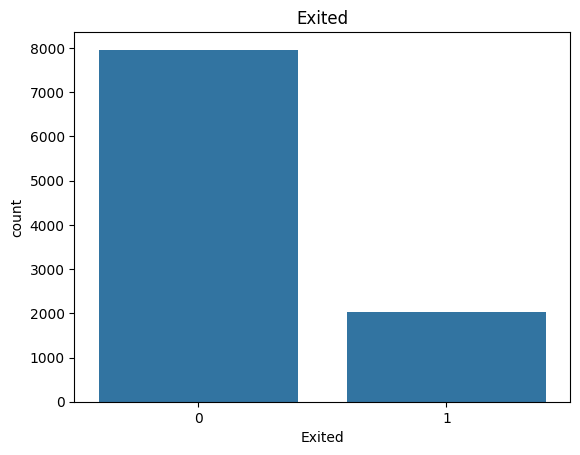

In [7]:
sns.countplot(x='Exited', data=df)
plt.title('Exited')
plt.show()

### 이탈률 분석 결과
- 전체 고객 중 약 20%가 이탈.
- 클래스 불균형이 존재.

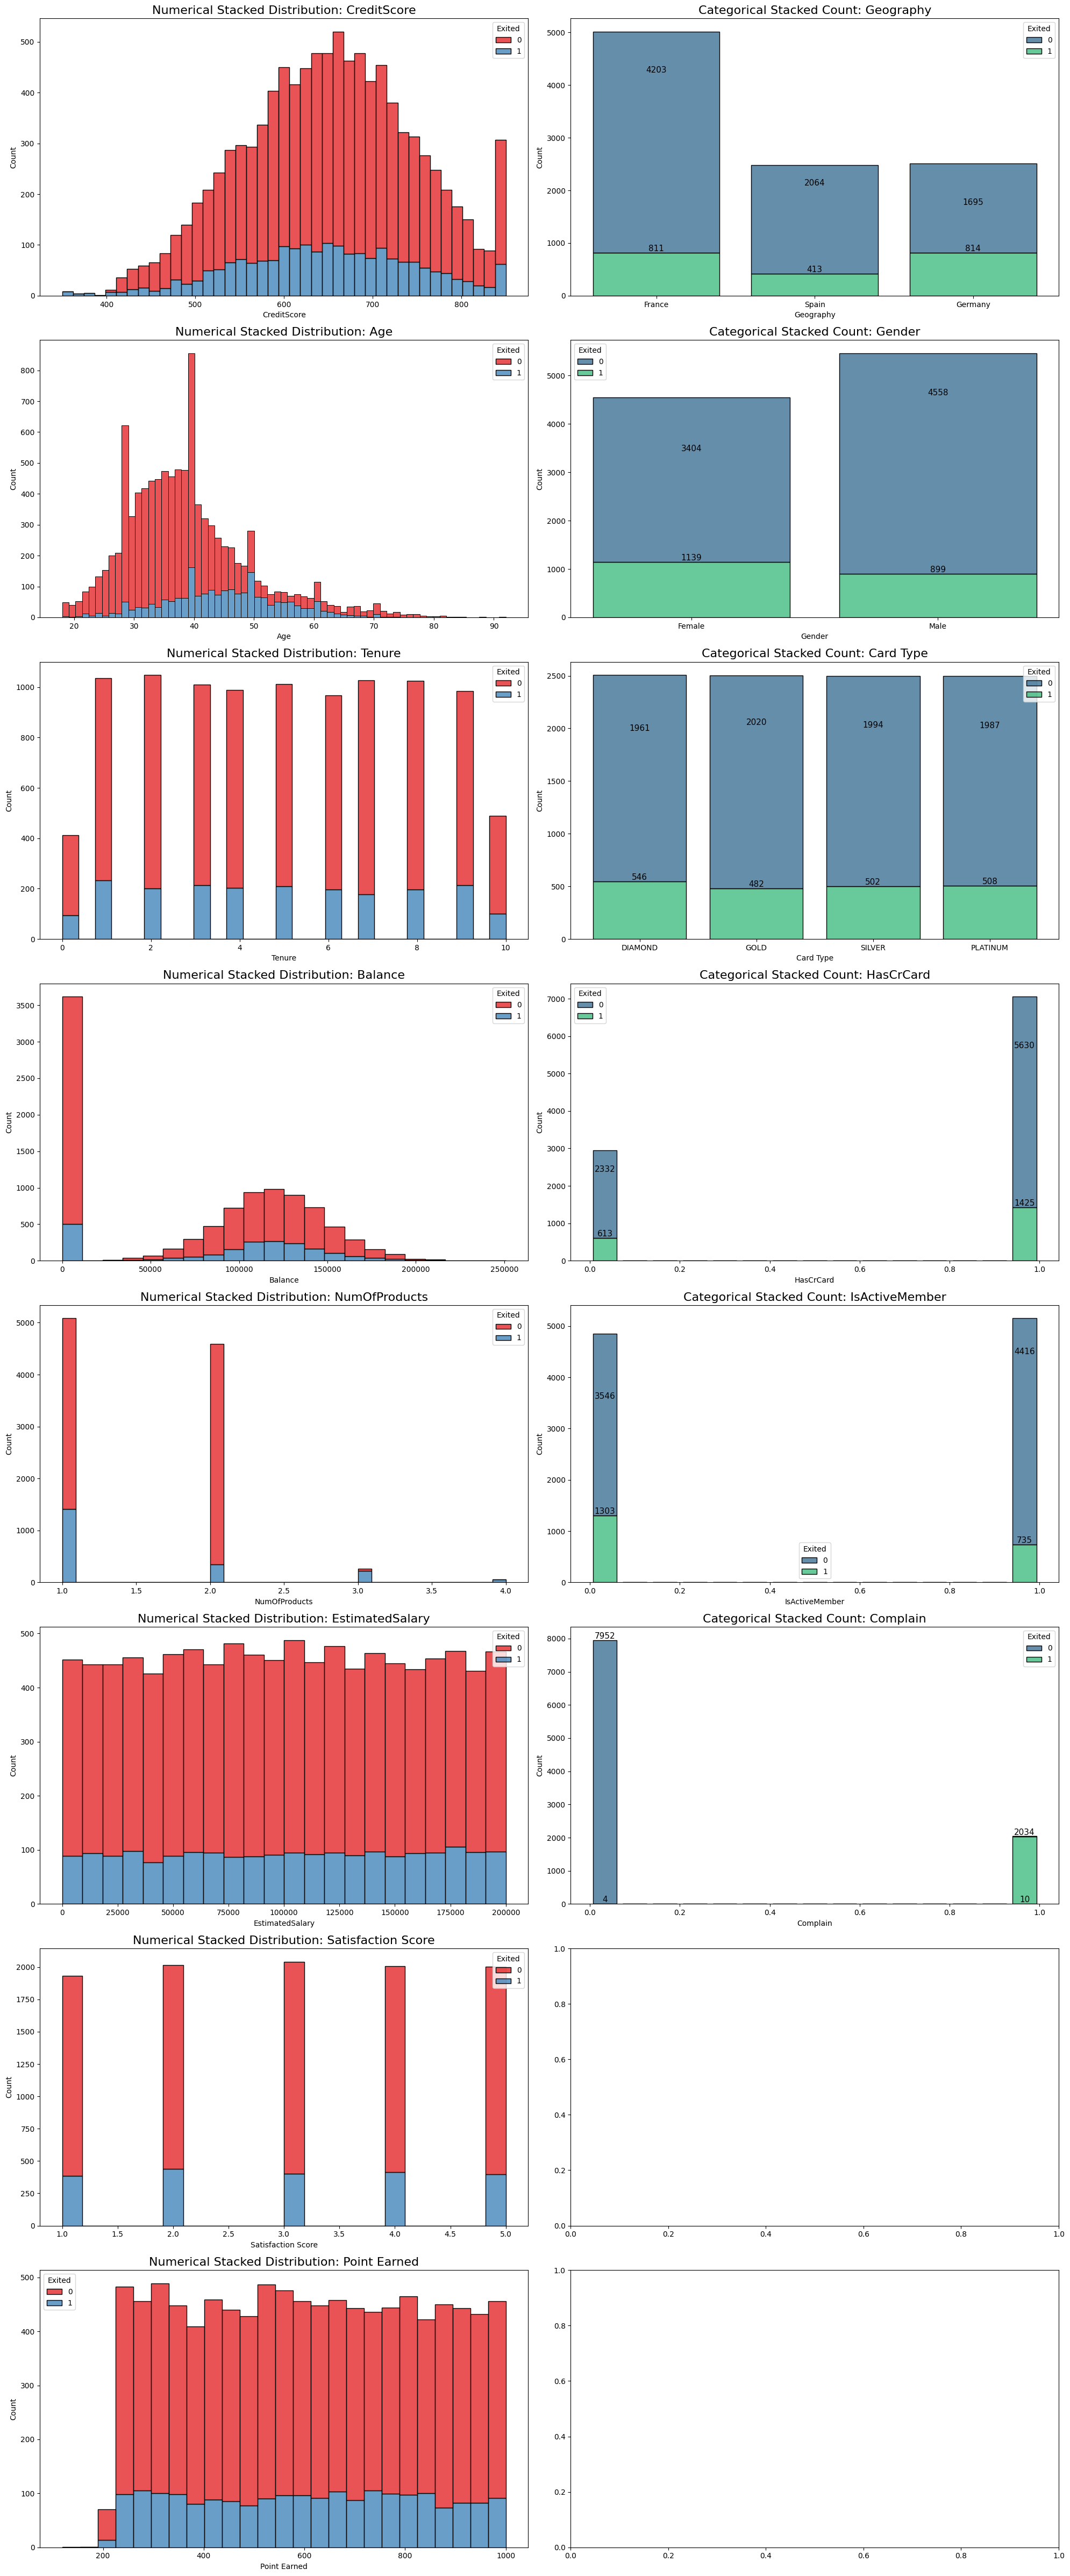

In [13]:
n_rows = max(len(num_cols), len(cat_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(20, 6 * n_rows))

for i in range(n_rows):
    # --- 왼쪽: 수치형 변수 (Stacked Histogram) ---
    if i < len(num_cols):
        col_n = num_cols[i]
        sns.histplot(data=df, x=col_n, hue='Exited', 
                     multiple="stack", palette='Set1', ax=axes[i, 0])
        axes[i, 0].set_title(f'Numerical Stacked Distribution: {col_n}', fontsize=16)
        axes[i, 0].set_xlabel(col_n)
    
    # --- 오른쪽: 범주형 변수 (Stacked Count Plot) ---
    if i < len(cat_cols):
        col_c = cat_cols[i]
        sns.histplot(data=df, x=col_c, hue='Exited', 
                     multiple="stack", shrink=.8, palette='viridis', ax=axes[i, 1])
        
        for p in axes[i, 1].patches:
            h = p.get_height()
            if h > 0:
                axes[i, 1].annotate(f'{int(h)}', 
                                    (p.get_x() + p.get_width() / 2., h), 
                                    ha='center', va='bottom', fontsize=11)
        
        axes[i, 1].set_title(f'Categorical Stacked Count: {col_c}', fontsize=16)
        axes[i, 1].set_xlabel(col_c)
        axes[i, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Boxplot of Numerical Columns by Exited

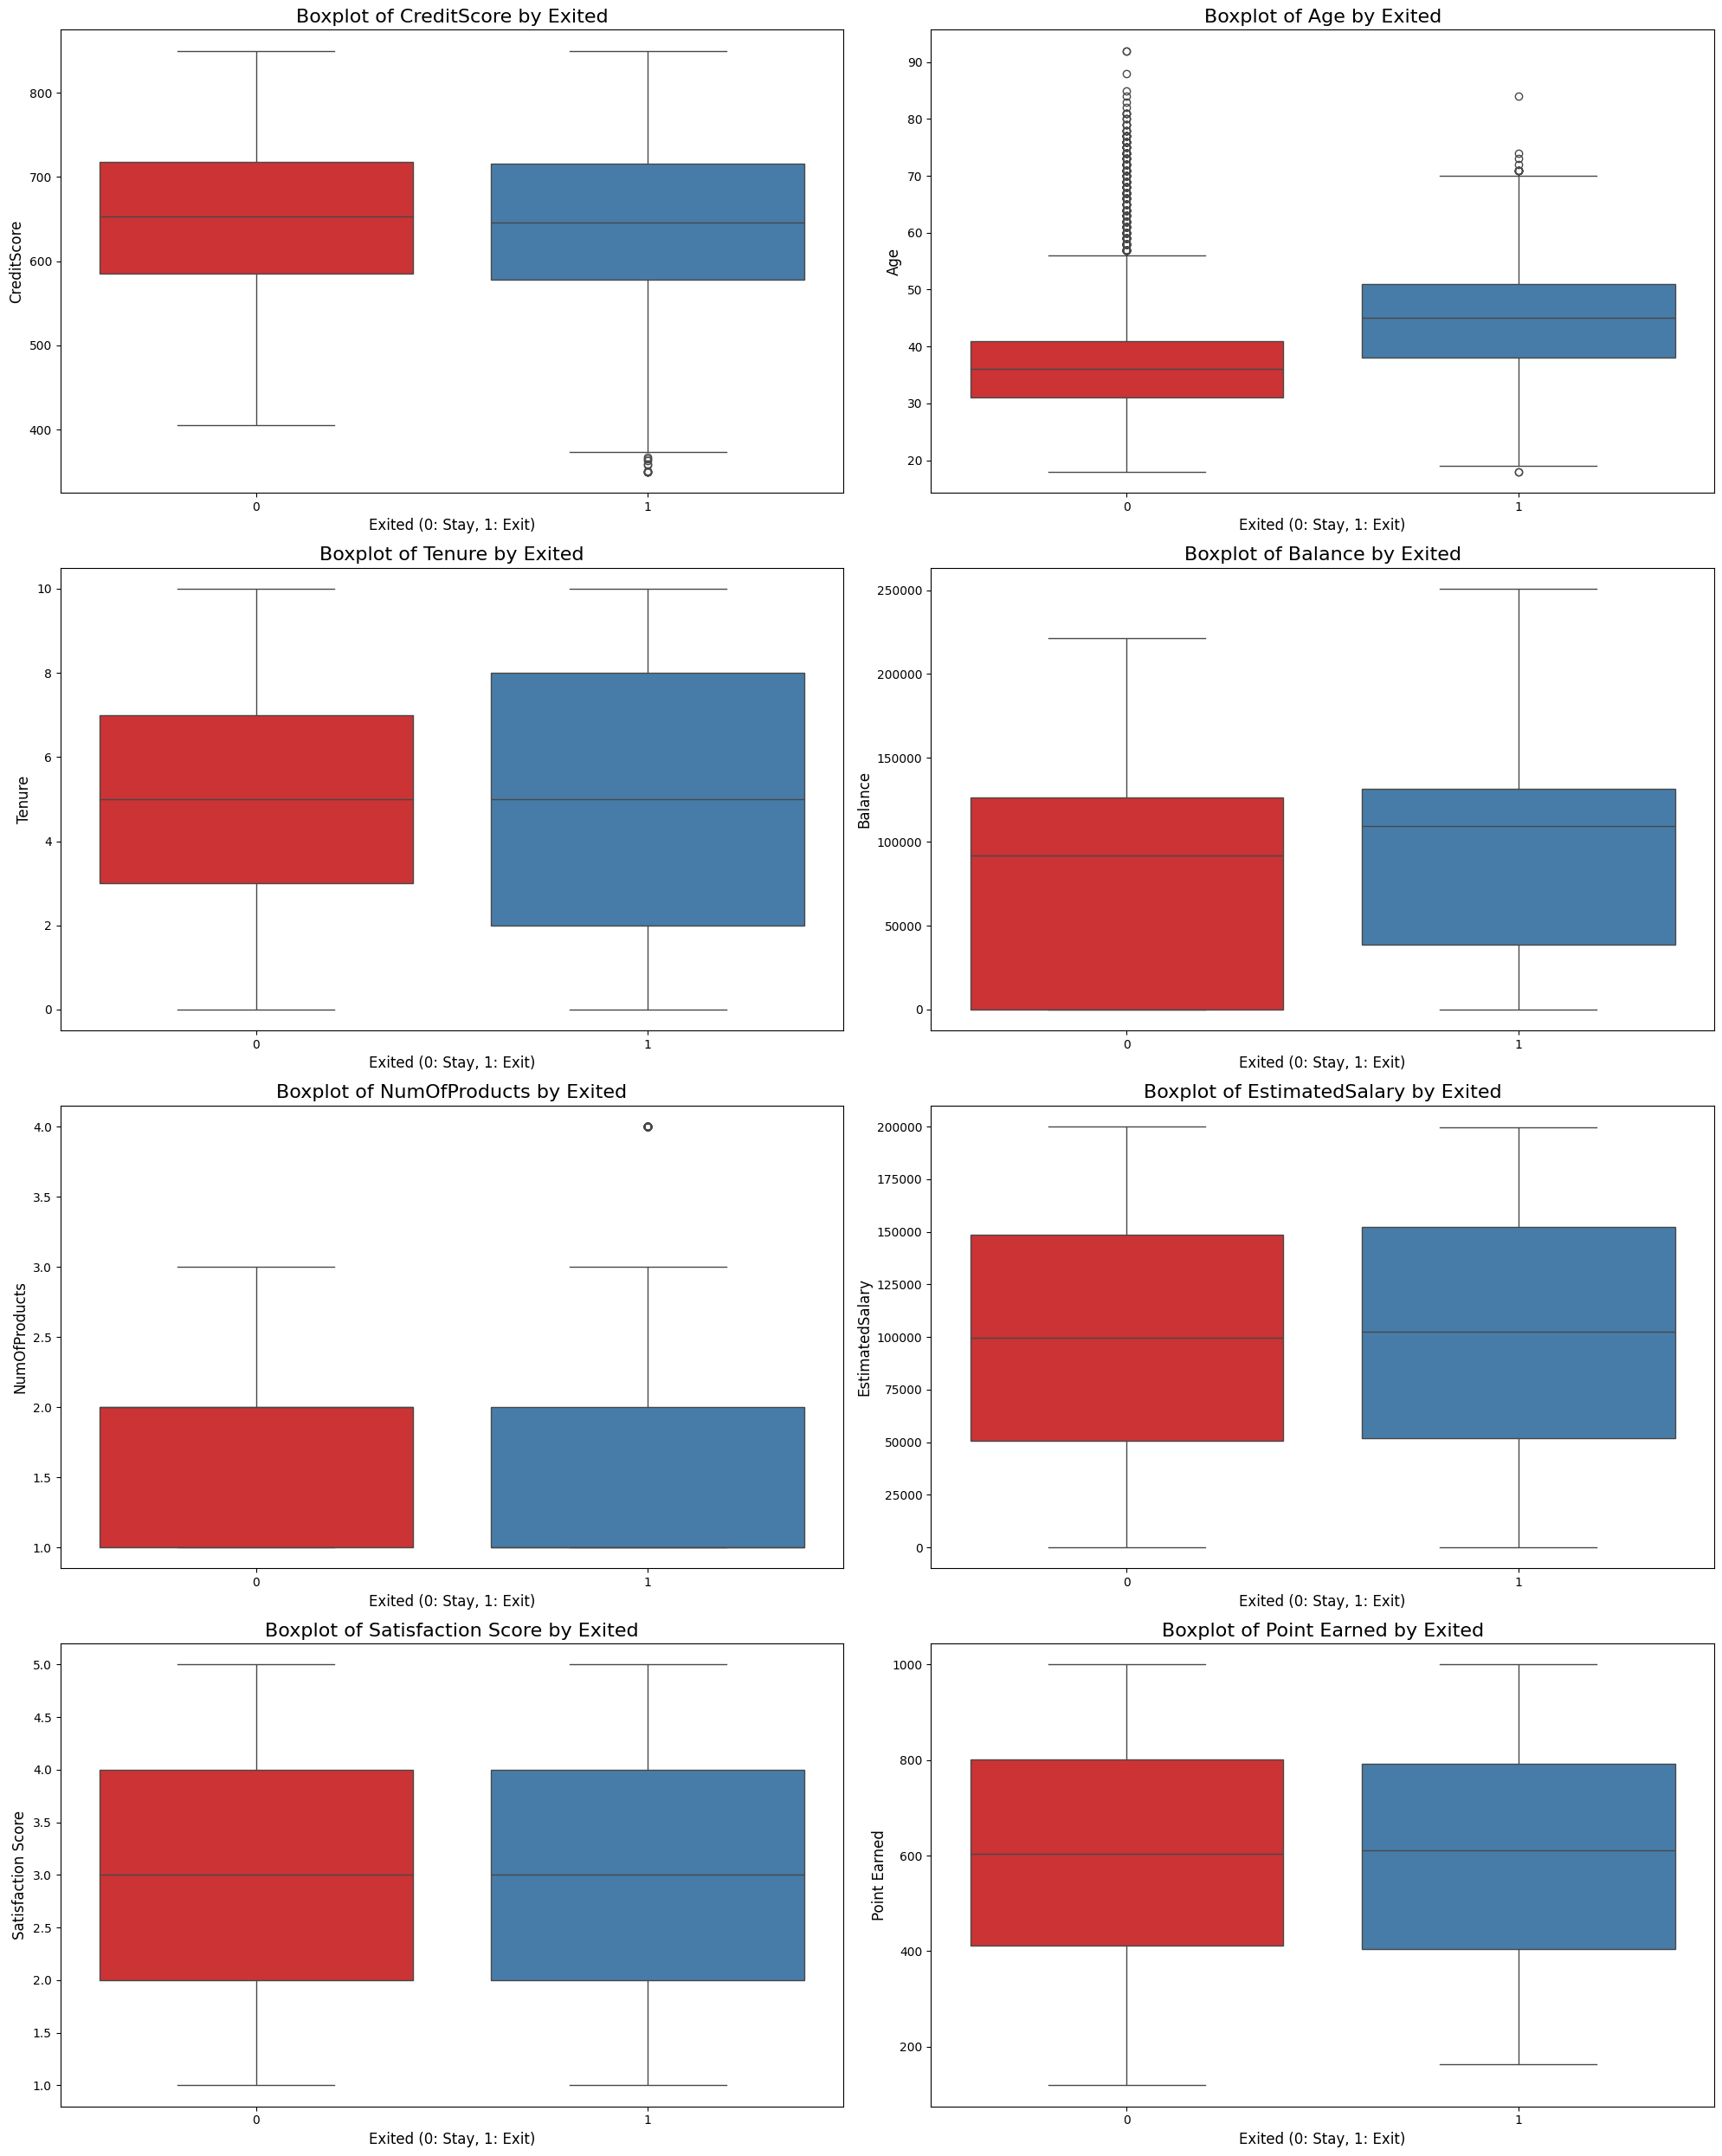

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

axes_flat = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Exited', y=col, hue='Exited', 
                palette='Set1', ax=axes_flat[i], legend=False)
    
    axes_flat[i].set_title(f'Boxplot of {col} by Exited', fontsize=16)
    axes_flat[i].set_xlabel('Exited (0: Stay, 1: Exit)', fontsize=12)
    axes_flat[i].set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

## Exited Rate by Categorical Columns

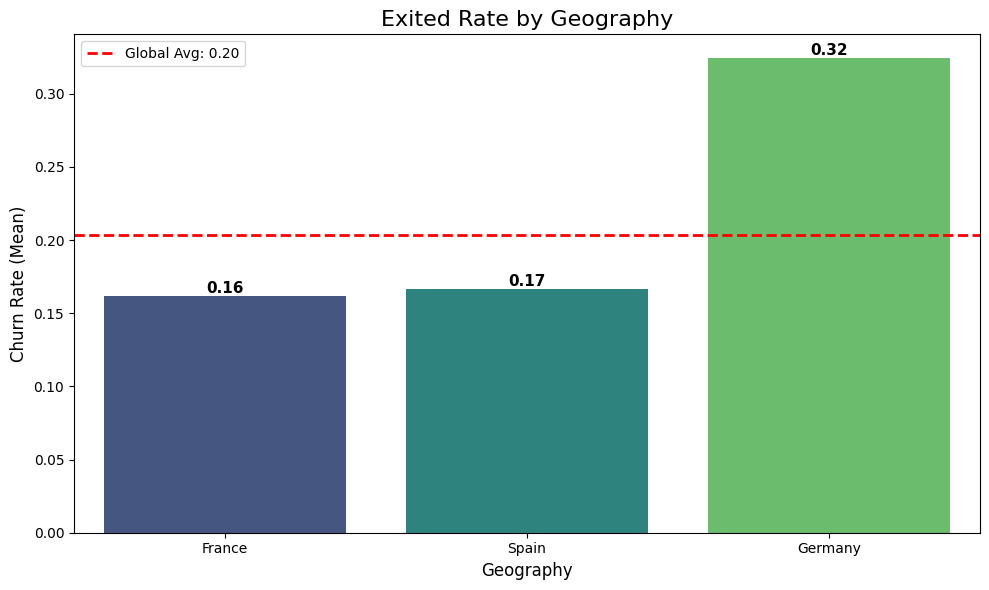

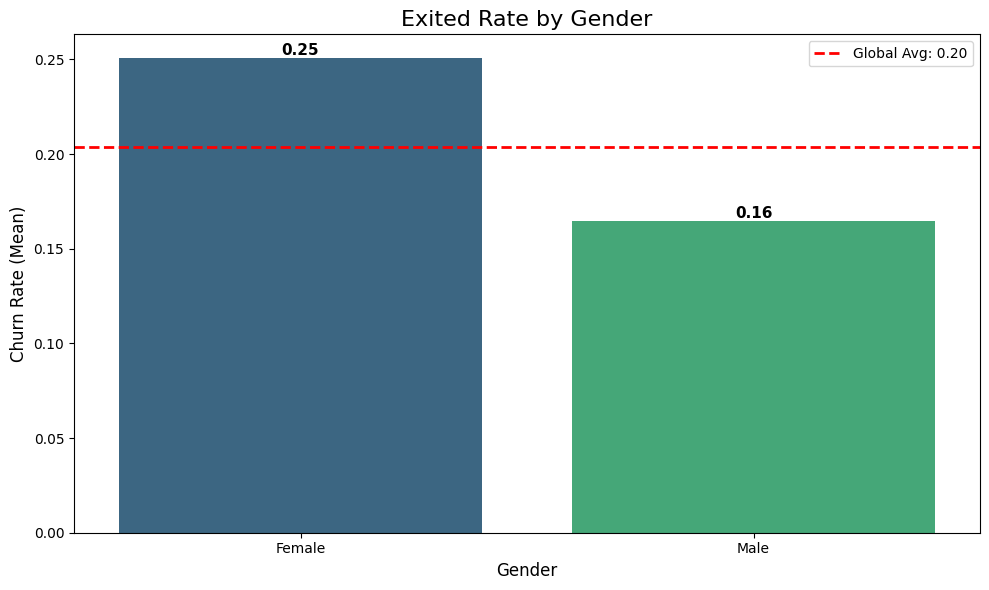

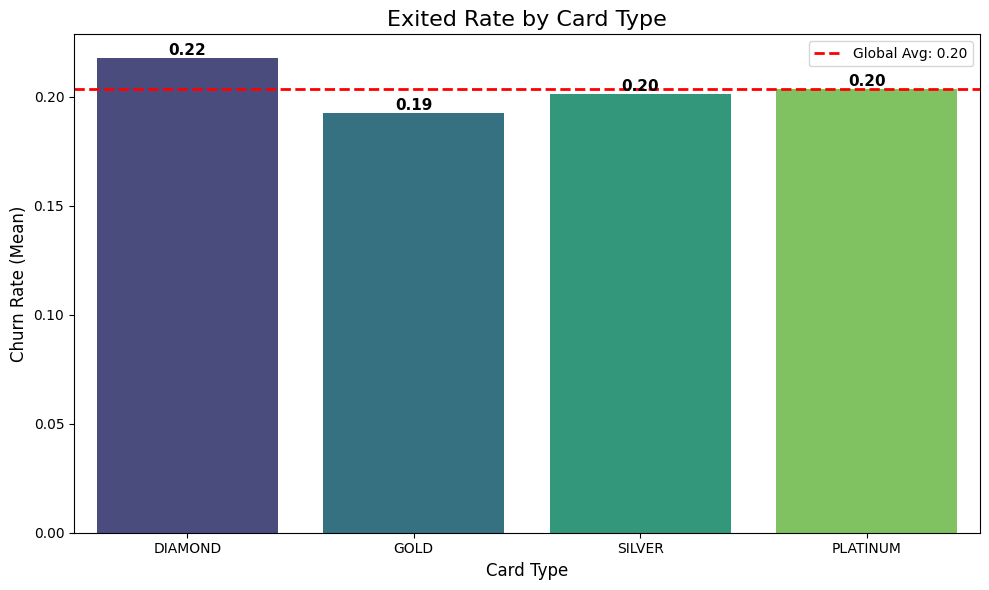

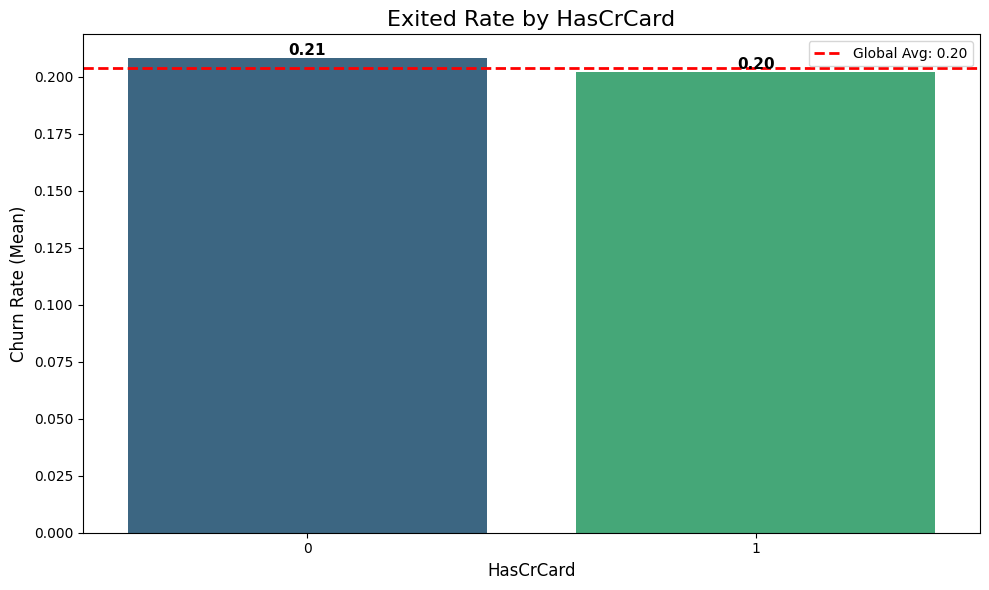

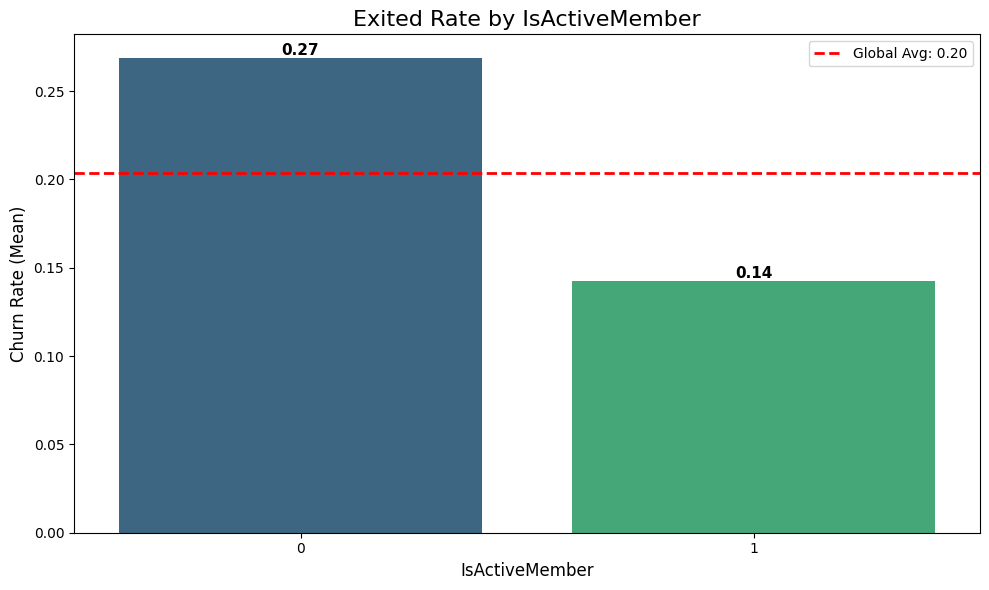

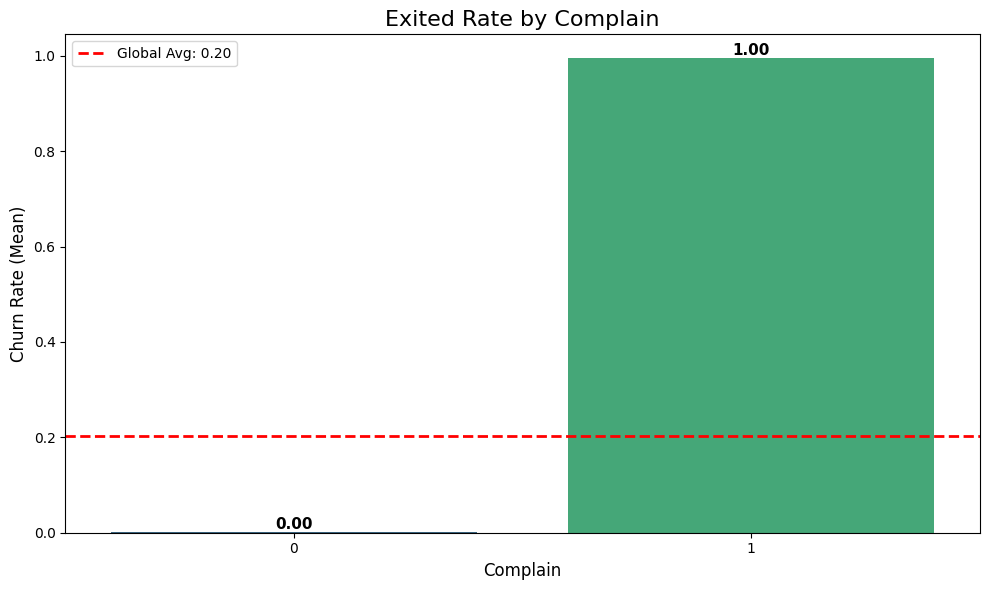

In [11]:
overall_churn_rate = df['Exited'].mean()

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(data=df, x=col, y='Exited', hue=col, 
                     palette='viridis', errorbar=None, legend=False)
    
    # 전체 평균 이탈률 가이드라인 (빨간 점선)
    plt.axhline(overall_churn_rate, color='red', linestyle='--', linewidth=2, label=f'Global Avg: {overall_churn_rate:.2f}')
    
    plt.title(f'Exited Rate by {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Churn Rate (Mean)', fontsize=12)
    plt.legend()
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=11, fontweight='bold', color='black')
    
    plt.tight_layout()
    plt.show()

## Correlation Matrix

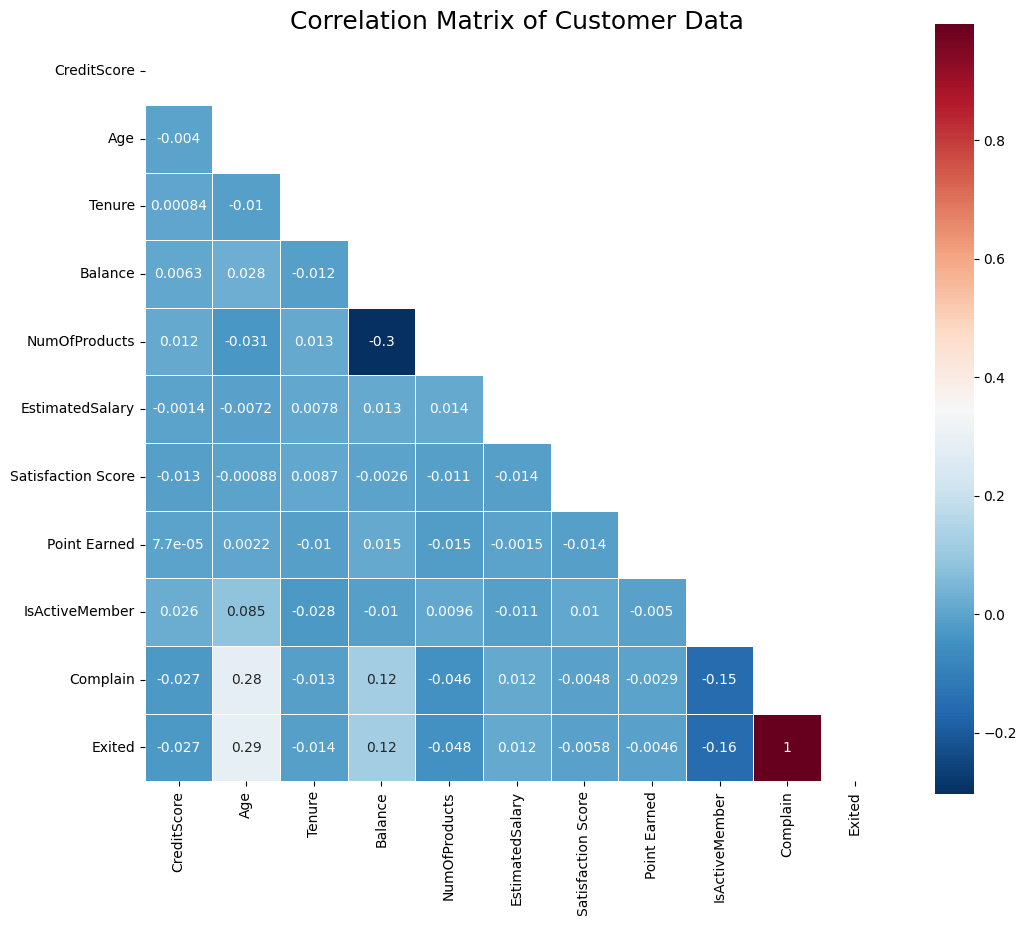

In [12]:
corr_cols = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
    'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 
    'IsActiveMember', 'Complain', 'Exited'
]

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            annot=True,           # 숫자 표시           
            cmap='RdBu_r',        # 파랑(양) ~ 빨강(음) 컬러맵
            mask=mask,            # 마스크 적용
            linewidths=0.5, 
            square=True)

plt.title('Correlation Matrix of Customer Data', fontsize=18)
plt.show()

# EDA 분석 결과

## 1. 수치형 변수 주요 인사이트 (Boxplot 분석)
* **Age (나이):** 이탈 예측의 가장 핵심 변수. 이탈 고객층의 연령대가 유지 고객보다 눈에 띄게 높음.
* **Balance (잔액):** 잔액이 높은 고객군에서 이탈 비중이 상승하는 경향이 있음.
* **NumOfProducts (상품 수):** 보유 상품 개수에 따라 이탈 패턴이 갈림.
* **기타 (Tenure, CreditScore 등):** 이탈 여부에 따른 수치 차이가 미미하여 단독 영향력은 낮음.



## 2. 범주형 변수 주요 인사이트 (Churn Rate 분석)
* **Complain (불만):** 불만 제기 시 이탈률이 거의 100%에 육박하는 결정적 지표.
* **Geography (국가):** 독일(Germany) 지역 고객의 이탈률이 타 국가 대비 현저히 높음.
* **IsActiveMember (활성):** 비활성 회원의 이탈 위험이 훨씬 높으므로 활동 유도가 중요함.
* **Gender (성별):** 여성 고객의 이탈률이 남성보다 상대적으로 높음.



## 3. 상관관계 분석 결과 (Correlation Matrix)
모든 변수와 이탈(Exited) 간의 수치적 연관성을 분석한 결과입니다.

* **가장 강력한 상관관계 (Strongest):** * `Complain` (0.90+): 이탈과 거의 완벽하게 일치하는 지표.
    * `Age` (0.28+): 나이가 많을수록 이탈 가능성이 높은 정적(+) 상관관계를 보임.

* **주요 음의 상관관계 (Negative):** * `IsActiveMember` (-0.16): 활성 회원일수록 이탈 가능성이 낮아지는 부적(-) 상관관계를 보임.

* **예상외로 낮은 상관관계 (Weak):**
    * `EstimatedSalary`, `Satisfaction Score`, `Point Earned`: 이탈 여부와 수치적으로 거의 무관한(0.01 내외) 것으로 나타남.